## MLB Test Data Visualization

In [10]:
import pandas as pd
print('Pandas version:', pd.__version__)

Pandas version: 0.23.4


In [100]:
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
fname = '/Users/alexhu/Documents/Juptyer_Python_Files/pitch_movement_mlb_2019.csv'


In [14]:
f = open('pitch_movement_mlb_2019.csv')
data = pd.read_csv(f) # lots of other pd.read_... functions
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(1757, 24)


In [15]:
data.head()

,year,last_name,first_name,pitcher_id,team_name,team_name_abbrev,pitch_hand,avg_speed,pitches_thrown,total_pitches,...,pitcher_break_z,league_break_z,diff_z,rise,pitcher_break_x,league_break_x,diff_x,tail,percent_rank_diff_z,percent_rank_diff_x
0,2019,Lynn,Lance,458681,Rangers,TEX,R,94.6,1858,3553,...,15.9,-15.3,-0.6,-4,6.1,-7.9,-1.8,-22,0.385151,0.287703
1,2019,Lopez,Reynaldo,625643,White Sox,CWS,R,95.4,1850,3163,...,15.2,-14.6,-0.6,-4,10.0,-7.5,2.5,34,0.385151,0.772622
2,2019,Cole,Gerrit,543037,Astros,HOU,R,97.1,1733,3362,...,10.9,-13.7,2.8,20,11.4,-7.8,3.6,46,0.969838,0.879350
3,2019,Verlander,Justin,434378,Astros,HOU,R,94.6,1617,3448,...,10.7,-13.6,2.9,21,10.1,-6.9,3.2,46,0.979118,0.839907
4,2019,Odorizzi,Jake,543606,Twins,MIN,R,92.9,1613,2787,...,15.5,-16.2,0.7,4,10.6,-7.4,3.2,43,0.677494,0.839907


In [17]:
data.columns

Index(['year', 'last_name', ' first_name', 'pitcher_id', 'team_name',
       'team_name_abbrev', 'pitch_hand', 'avg_speed', 'pitches_thrown',
       'total_pitches', 'pitches_per_game', 'pitch_per', 'pitch_type',
       'pitch_type_name', 'pitcher_break_z', 'league_break_z', 'diff_z',
       'rise', 'pitcher_break_x', 'league_break_x', 'diff_x', 'tail',
       'percent_rank_diff_z', 'percent_rank_diff_x'],
      dtype='object')

In [25]:
data['pitches_thrown'].sum(axis=0)

651645

In [30]:
jays = data['team_name'] == "Blue Jays"

In [32]:
jays.head()

0    False
1    False
2    False
3    False
4    False
Name: team_name, dtype: bool

In [49]:
jays_data = data[jays]

for i, row in jays_data.iterrows(): 
    #print(i, type(row))
    print(row['last_name'],)

Thornton
Pannone
Thornton
Font
Godley
Gaviglio
Gaviglio
Godley
Thornton
Law
Waguespack
Mayza
Richard
Kingham
Giles
Giles
Law
Luciano
Shafer
Mayza
Waguespack
Reid-Foley
Font
Pannone
Buchholz
Godley
Thornton
Stewart
Law
Waguespack
Reid-Foley
Font
Shafer
Kingham
Buchholz
Pannone
Buchholz
Waguespack
Richard
Mayza
Kingham
Font
Buchholz
Luciano
Stewart
Law
Font
Shafer
Buchholz
Gaviglio
Kingham
Luciano
Richard
Waguespack
Kingham
Godley
Waguespack
Stewart
Reid-Foley
Shafer
Reid-Foley
Stewart


In [78]:
blue_jays = data.loc[data['team_name'] == 'Blue Jays']

print(blue_jays)

      year   last_name  first_name  pitcher_id  team_name team_name_abbrev  \
43    2019    Thornton       Trent      663423  Blue Jays              TOR   
161   2019     Pannone      Thomas      623381  Blue Jays              TOR   
188   2019    Thornton       Trent      663423  Blue Jays              TOR   
207   2019        Font      Wilmer      521655  Blue Jays              TOR   
261   2019      Godley        Zack      643327  Blue Jays              TOR   
279   2019    Gaviglio         Sam      543208  Blue Jays              TOR   
305   2019    Gaviglio         Sam      543208  Blue Jays              TOR   
367   2019      Godley        Zack      643327  Blue Jays              TOR   
537   2019    Thornton       Trent      663423  Blue Jays              TOR   
539   2019         Law       Derek      571882  Blue Jays              TOR   
551   2019  Waguespack       Jacob      621097  Blue Jays              TOR   
572   2019       Mayza         Tim      641835  Blue Jays       

In [79]:
#df = pd.Dataframe(data, columns = 'first_name')
blue_jays.columns

Index(['year', 'last_name', ' first_name', 'pitcher_id', 'team_name',
       'team_name_abbrev', 'pitch_hand', 'avg_speed', 'pitches_thrown',
       'total_pitches', 'pitches_per_game', 'pitch_per', 'pitch_type',
       'pitch_type_name', 'pitcher_break_z', 'league_break_z', 'diff_z',
       'rise', 'pitcher_break_x', 'league_break_x', 'diff_x', 'tail',
       'percent_rank_diff_z', 'percent_rank_diff_x'],
      dtype='object')

In [86]:
blue_jays2 = blue_jays[['year', 'last_name', ' first_name',
        'pitch_hand', 'avg_speed', 'pitches_thrown',
       'total_pitches', 'pitches_per_game', 'pitch_per',
       'pitch_type_name', 'pitcher_break_z', 'league_break_z', 'percent_rank_diff_z', 'percent_rank_diff_x']] 
blue_jays2

,year,last_name,first_name,pitch_hand,avg_speed,pitches_thrown,total_pitches,pitches_per_game,pitch_per,pitch_type_name,pitcher_break_z,league_break_z,percent_rank_diff_z,percent_rank_diff_x
43,2019,Thornton,Trent,R,92.9,1203,2759,17.030864,0.436028,4-Seamer,15.8,-16.8,0.728538,0.064965
161,2019,Pannone,Thomas,L,89.7,774,1255,7.746914,0.616733,4-Seamer,18.6,-19.7,0.751740,0.904872
188,2019,Thornton,Trent,R,80.5,743,2759,17.030864,0.269300,Slider,52.3,-43.4,0.990991,0.660661
207,2019,Font,Wilmer,R,94.4,718,1541,9.512346,0.465931,4-Seamer,12.4,-14.0,0.839907,0.366589
261,2019,Godley,Zack,R,81.8,652,1548,9.555556,0.421189,Curveball,49.6,-51.3,0.372263,0.083942
279,2019,Gaviglio,Sam,R,84.3,632,1427,8.808642,0.442887,Slider,34.6,-37.0,0.231231,0.072072
305,2019,Gaviglio,Sam,R,89.2,605,1427,8.808642,0.423966,Sinker,26.0,-24.3,0.744361,0.413534
367,2019,Godley,Zack,R,89.9,550,1548,9.555556,0.355297,Sinker,29.9,-25.5,0.936090,0.296992
537,2019,Thornton,Trent,R,88.1,439,2759,17.030864,0.159116,Cutter,30.9,-29.1,0.269841,0.841270
539,2019,Law,Derek,R,94.0,438,1194,7.370370,0.366834,4-Seamer,15.9,-14.6,0.262181,0.127610


In [93]:
jays_pitchs = blue_jays2.groupby('pitch_type_name').sum()
jays_pitchs

,year,avg_speed,pitches_thrown,total_pitches,pitches_per_game,pitch_per,pitcher_break_z,league_break_z,percent_rank_diff_z,percent_rank_diff_x
pitch_type_name,,,,,,,,,,
4-Seamer,28266,1299.0,5805,14996,92.567901,5.137381,232.0,-228.2,7.122970,7.417633
Changeup,20190,835.8,1288,10480,64.691358,1.296884,328.4,-323.2,5.400000,4.362069
Curveball,16152,623.7,2067,9473,58.475309,1.619870,438.2,-446.1,3.302920,3.456204
Cutter,12114,530.9,1557,8362,51.617284,1.166151,164.6,-164.7,3.134921,3.007937
Sinker,20190,910.5,2960,10706,66.086420,2.935671,233.2,-234.8,4.988722,4.375940
Slider,24228,1010.7,3654,13178,81.345679,3.500027,459.7,-449.7,6.429429,4.369369
Splitter,4038,168.0,388,4300,26.543210,0.181311,60.0,-67.0,0.400000,0.700000


Text(0, 0.5, 'Num. of pitches')

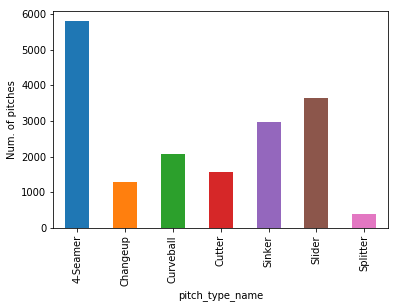

In [103]:
# Wrong: 
# data = data[data['Class'].loc['Amphibia']]

jays_pitch_proportion = jays_pitchs["pitches_thrown"]

jays_pitch_proportion.plot(kind ='bar')
plt.ylabel('Num. of pitches')